### Import packages.

In [16]:
import pandas as pd

from src.eda import eda_utils
from src.features import engineer_feats
from src.models import preprocess, train_model

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read in data.

In [17]:
df_trn = pd.read_csv('../data/raw/train.csv')
df_tst = pd.read_csv('../data/raw/test.csv')

print('Number of trn samples: {}'.format(len(df_trn)))
print('Number of tst samples: {}'.format(len(df_tst)))

Number of trn samples: 891
Number of tst samples: 418


## 1. Exploratory Data Analysis
| *Variable*    | *Definition*          | *Key*                   | *Data Type* |
| -----------   | --------------------- | ----------------------- | ----------- |
| PassengerId   | Unique identifier     |                         | `int`       |
| Pclass        | Ticket class          | 1: 1st, 2:2nd, 3:3rd    | `int`       |
| Name          | Name                  |                         | `str`       |
| Sex           | Sex                   |                         | `str`       |
| Age           | Age in years          |                         | `float`     |
| SibSp         | # siblings / spouses  |                         | `int`       |
| Parch         | # parents / children  |                         | `int`       |
| Ticket        | Ticket number	        |                         | `int`       |
| Fare          | Passenger fare	    |                         | `float`     |
| Cabin         | Cabin number	        |                         | `str`       |
| Embarked      | Port of Embarkation   | C, Q, S: 3 unique ports | `str`       |
| Survived      | Survival              | 0 = No, 1 = Yes         | `bin`       |

In [18]:
df_trn.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df_trn.describe()

PassengerId  Survived  Pclass   Age   SibSp  Parch  Fare 
count    891.00      891.00   891.00 714.00 891.00 891.00 891.00
mean     446.00        0.38     2.31  29.70   0.52   0.38  32.20
std      257.35        0.49     0.84  14.53   1.10   0.81  49.69
min        1.00        0.00     1.00   0.42   0.00   0.00   0.00
25%      223.50        0.00     2.00  20.12   0.00   0.00   7.91
50%      446.00        0.00     3.00  28.00   0.00   0.00  14.45
75%      668.50        1.00     3.00  38.00   1.00   0.00  31.00
max      891.00        1.00     3.00  80.00   8.00   6.00 512.33

In [20]:
# If the profile does not render here in the notebook,
# the HTML report is saved in ~/reports/.
eda_utils.pandas_profile(df_trn,
                         title="Profiling Titanic Dataset",
                         output_file="../reports/profile_titanic.html")

ProfileReport()...
profile.to_file()...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

profile.to_notebook_iframe()....


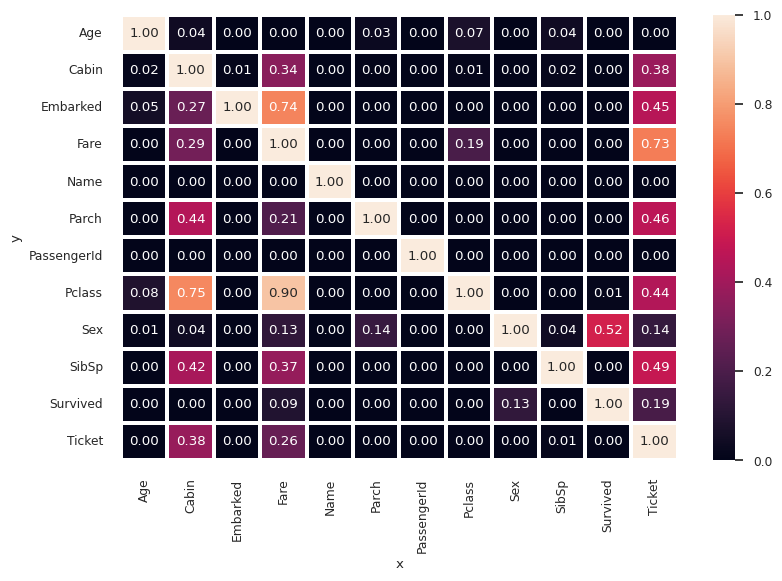

In [21]:
eda_utils.generate_pps(df_trn,
                       target="Survived")

Shape of your Data Set loaded: (891, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    11 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['PassengerId']

################ Binary_Classification problem #####################
To fix data quality issues automatically, import FixDQ from autoviz...


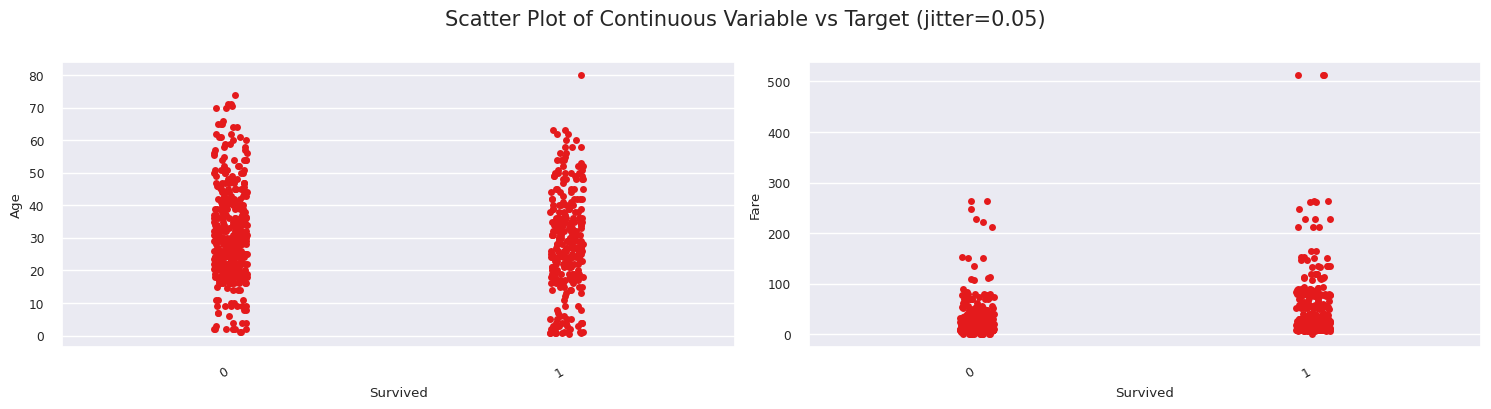

Total Number of Scatter Plots = 3


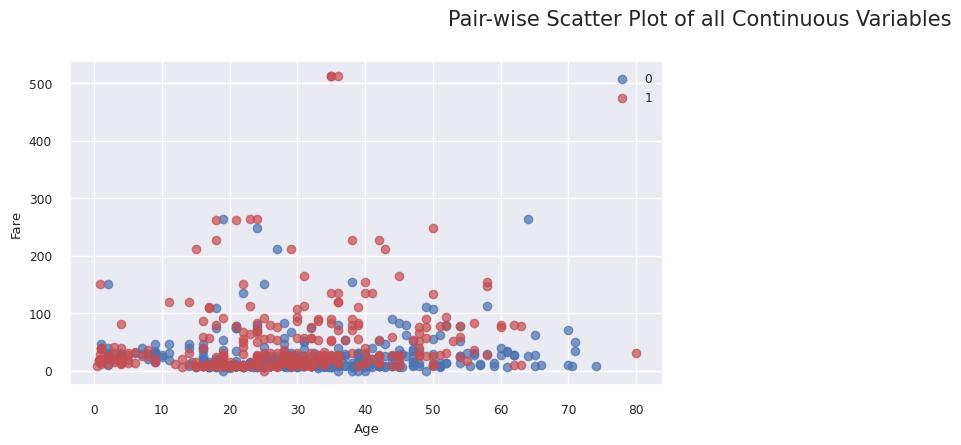

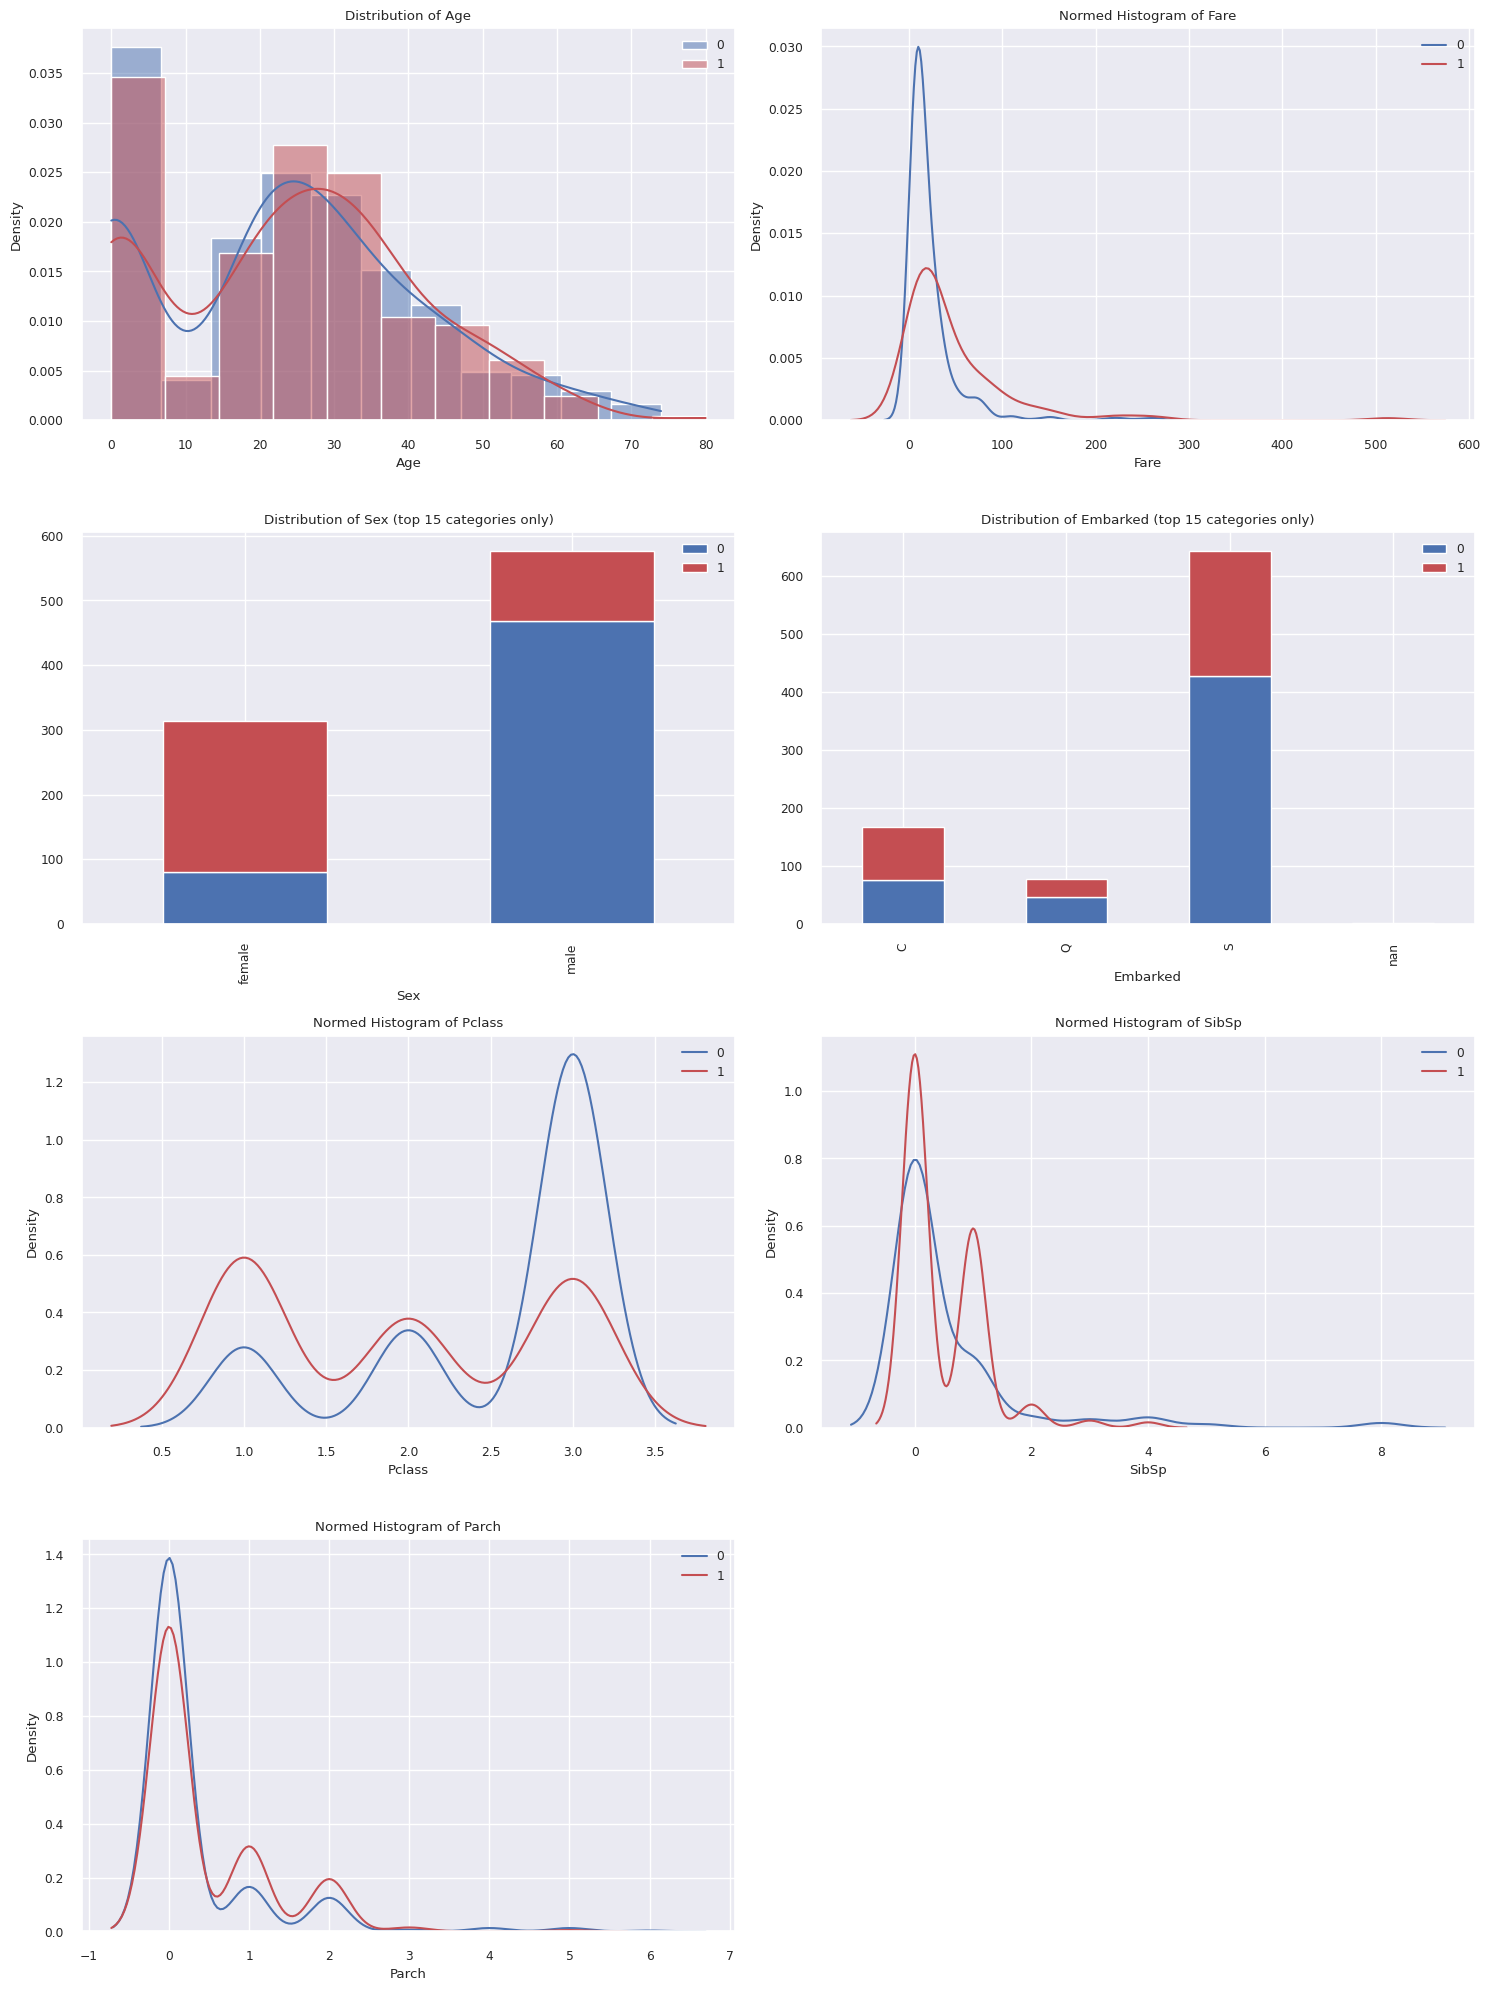

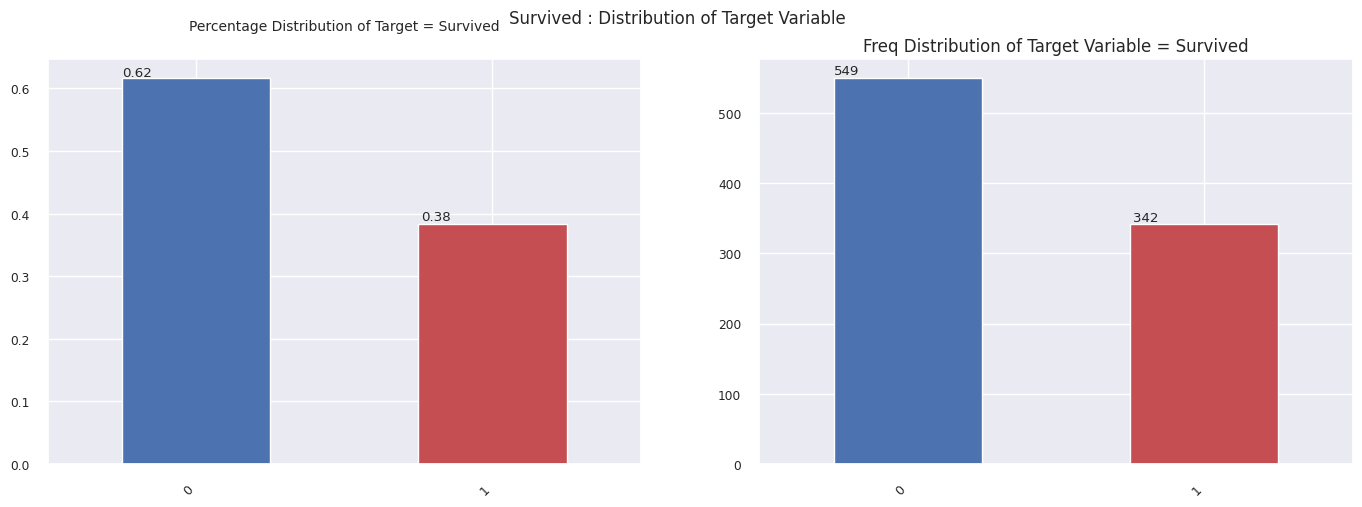

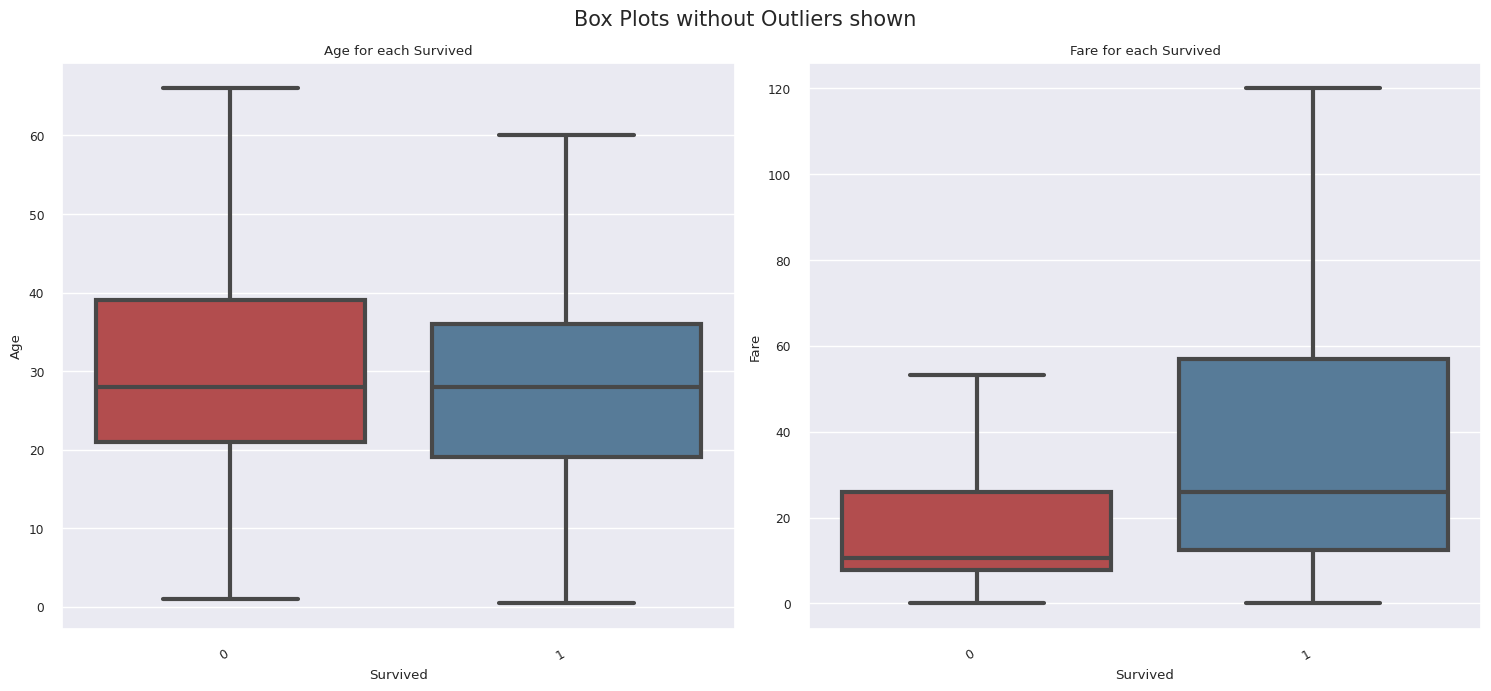

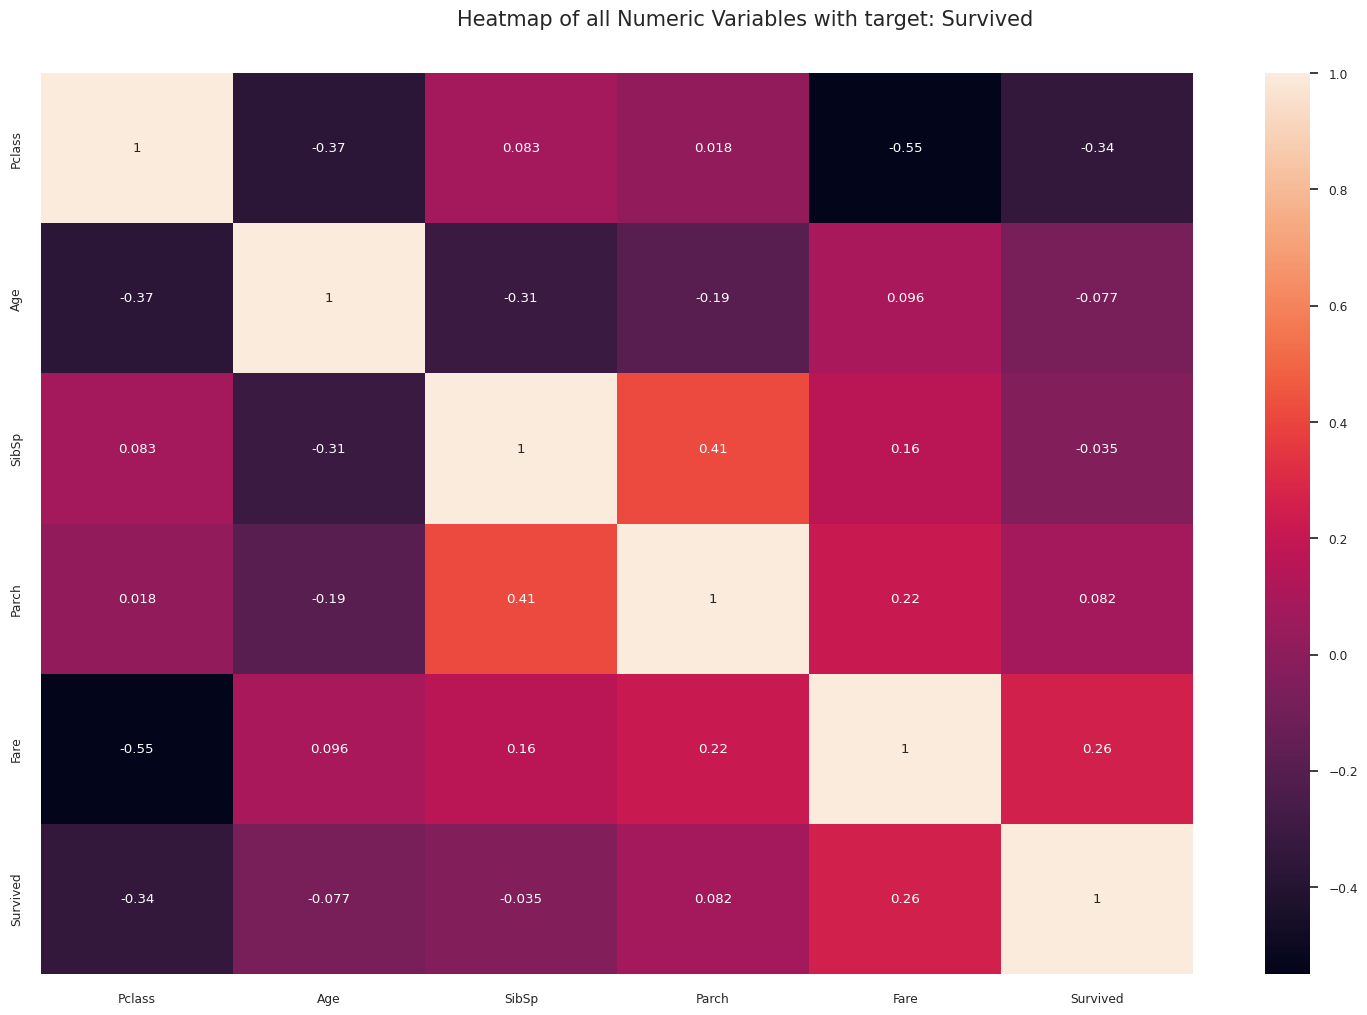

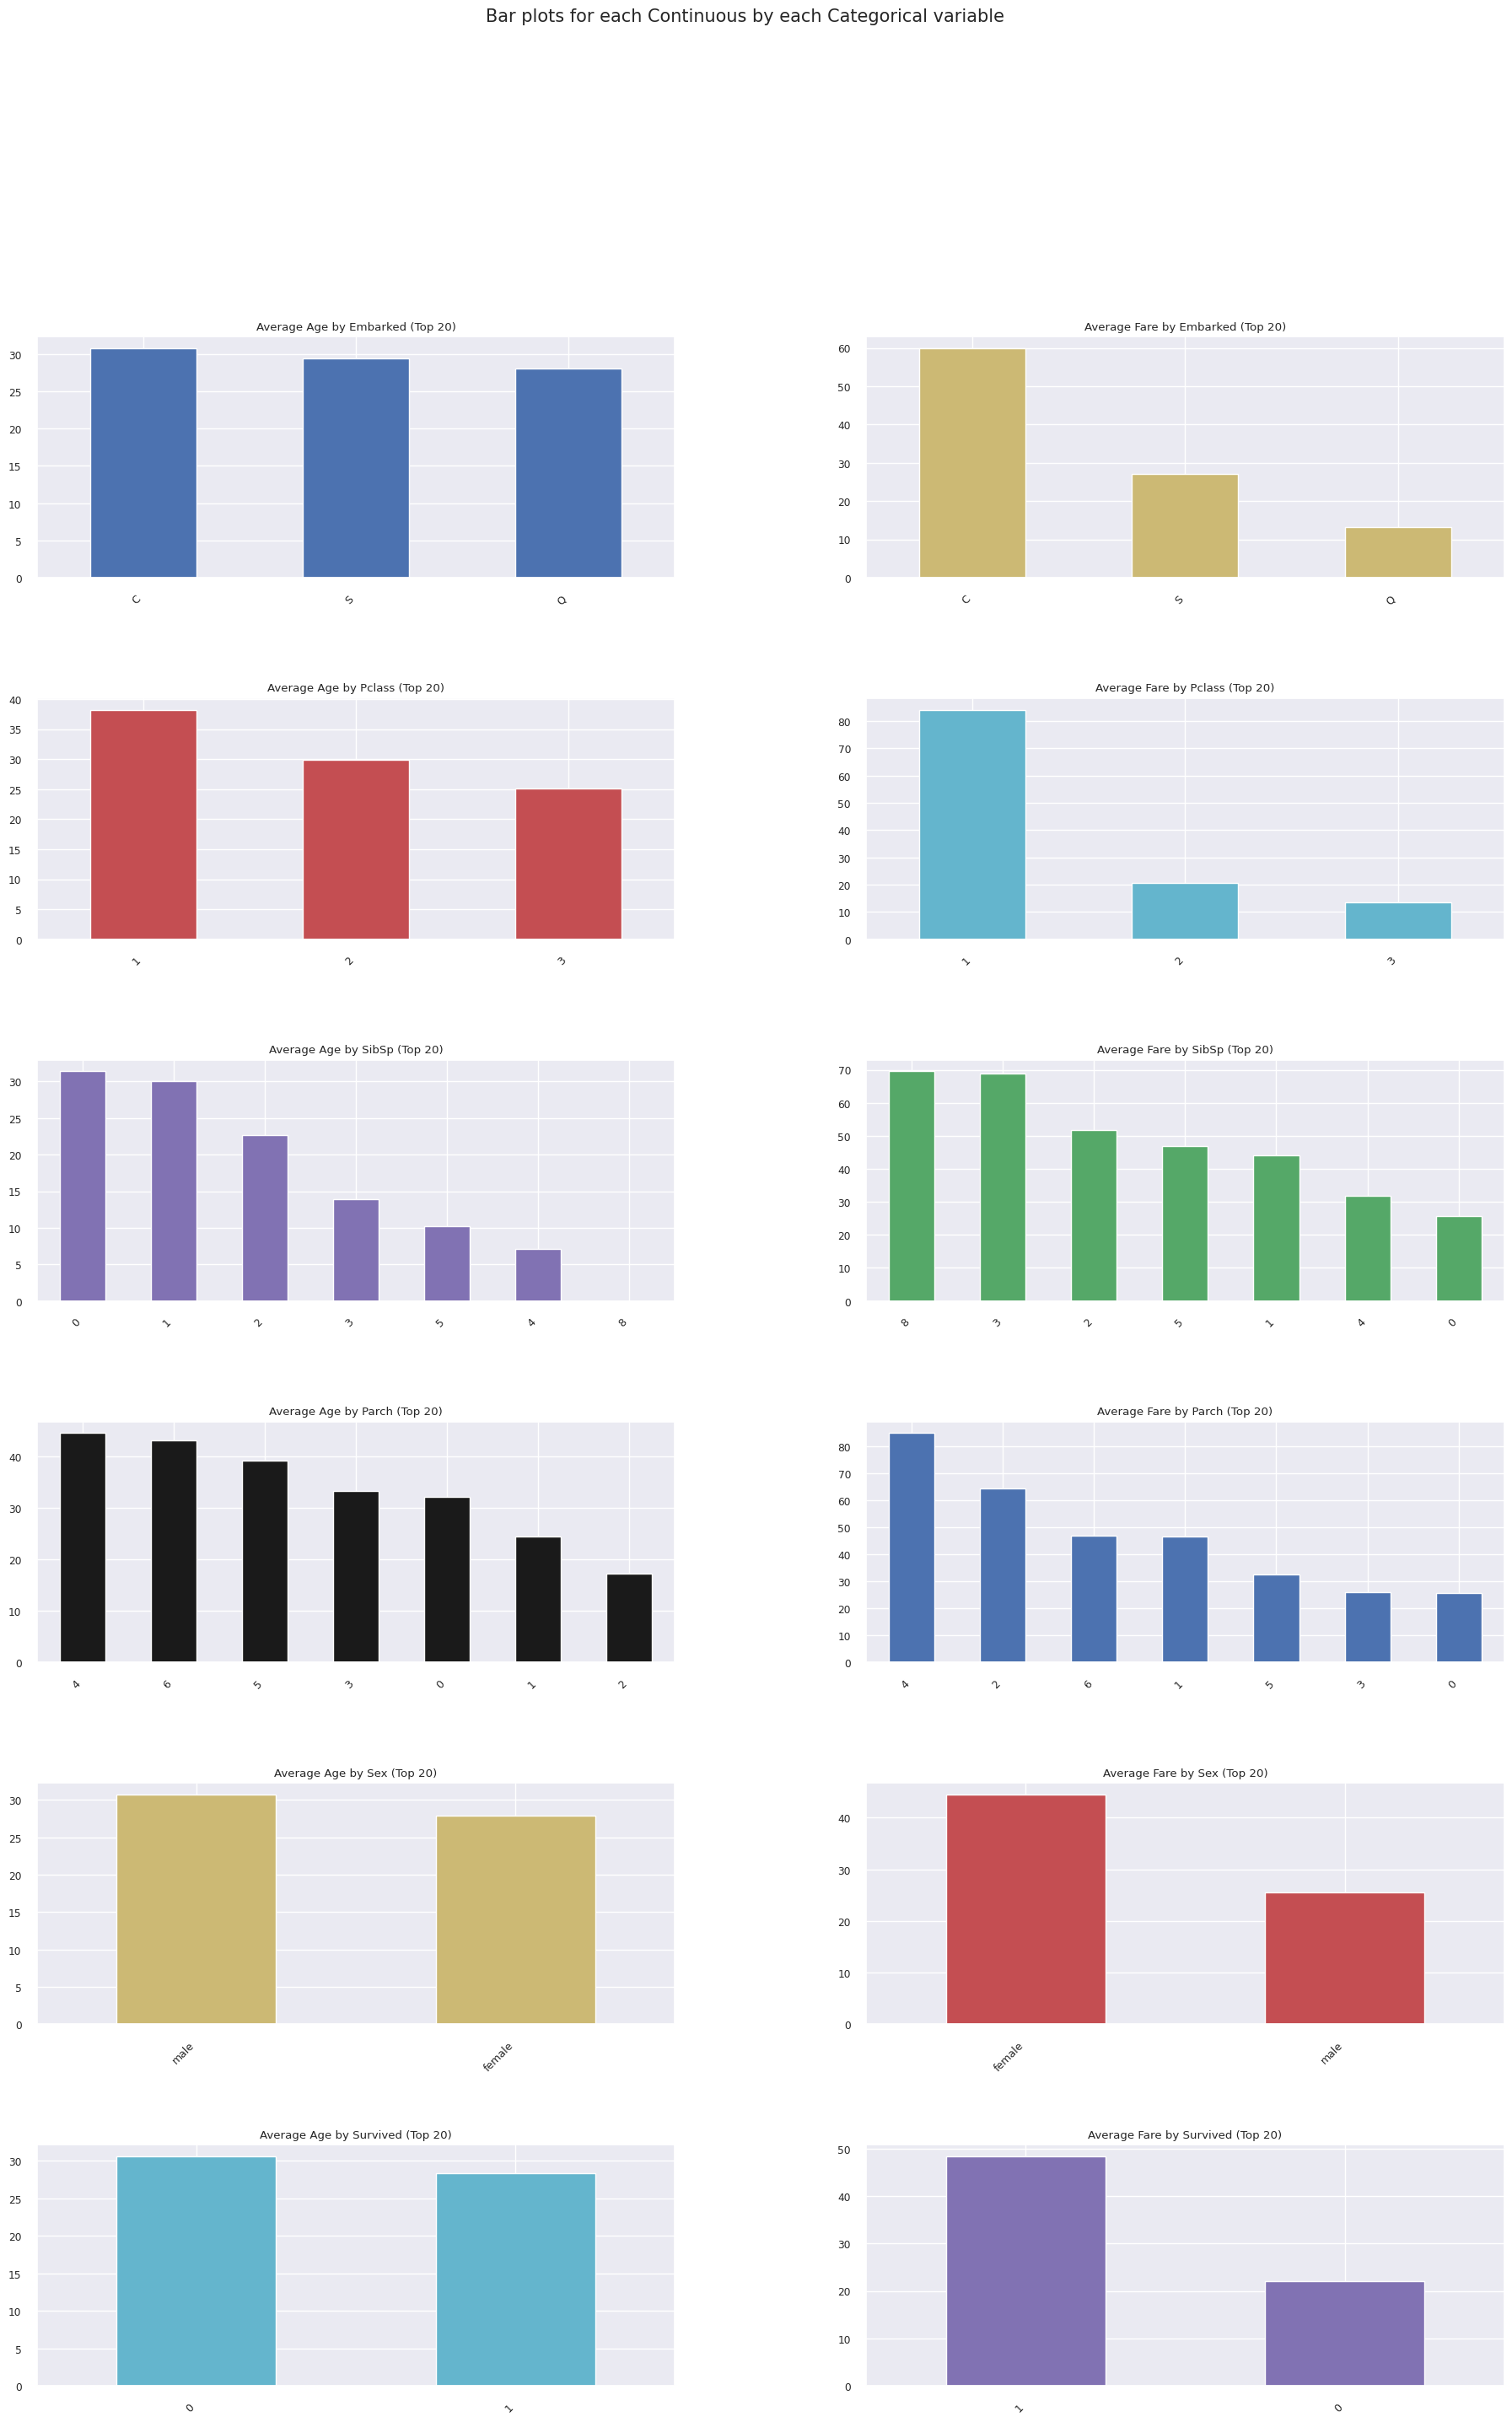

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/devvrit/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/devvrit/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/devvrit/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/devvrit/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/devvrit/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/devvrit/nltk_data...
[nltk_data]    |   Package movie_reviews is already

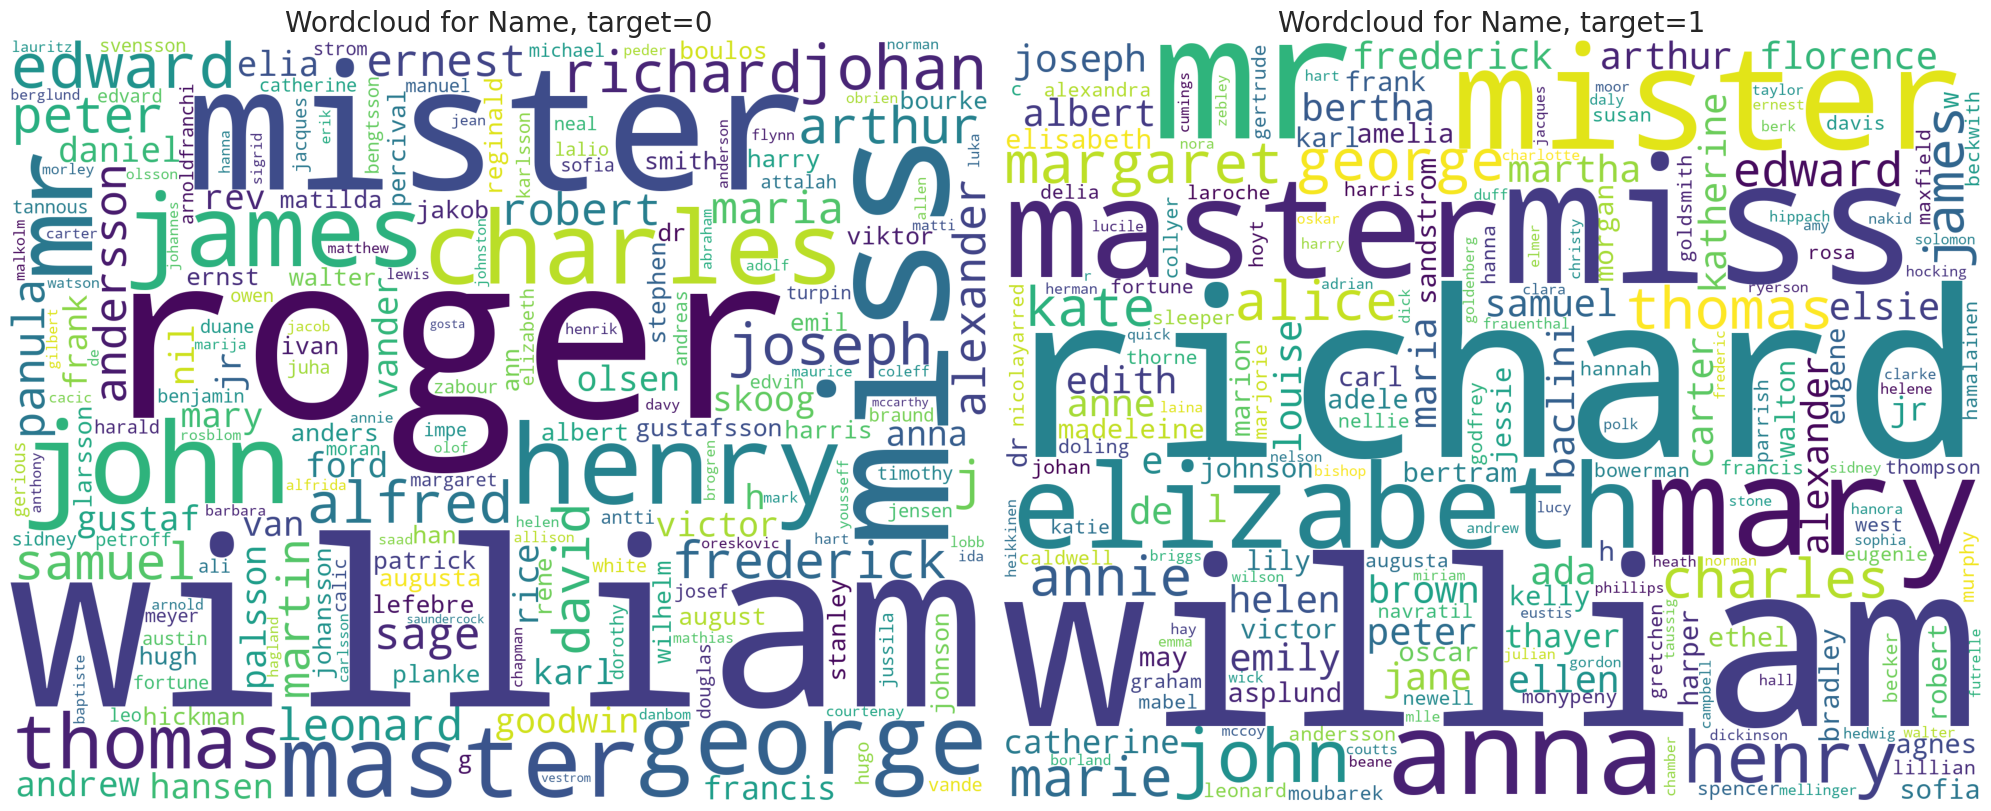

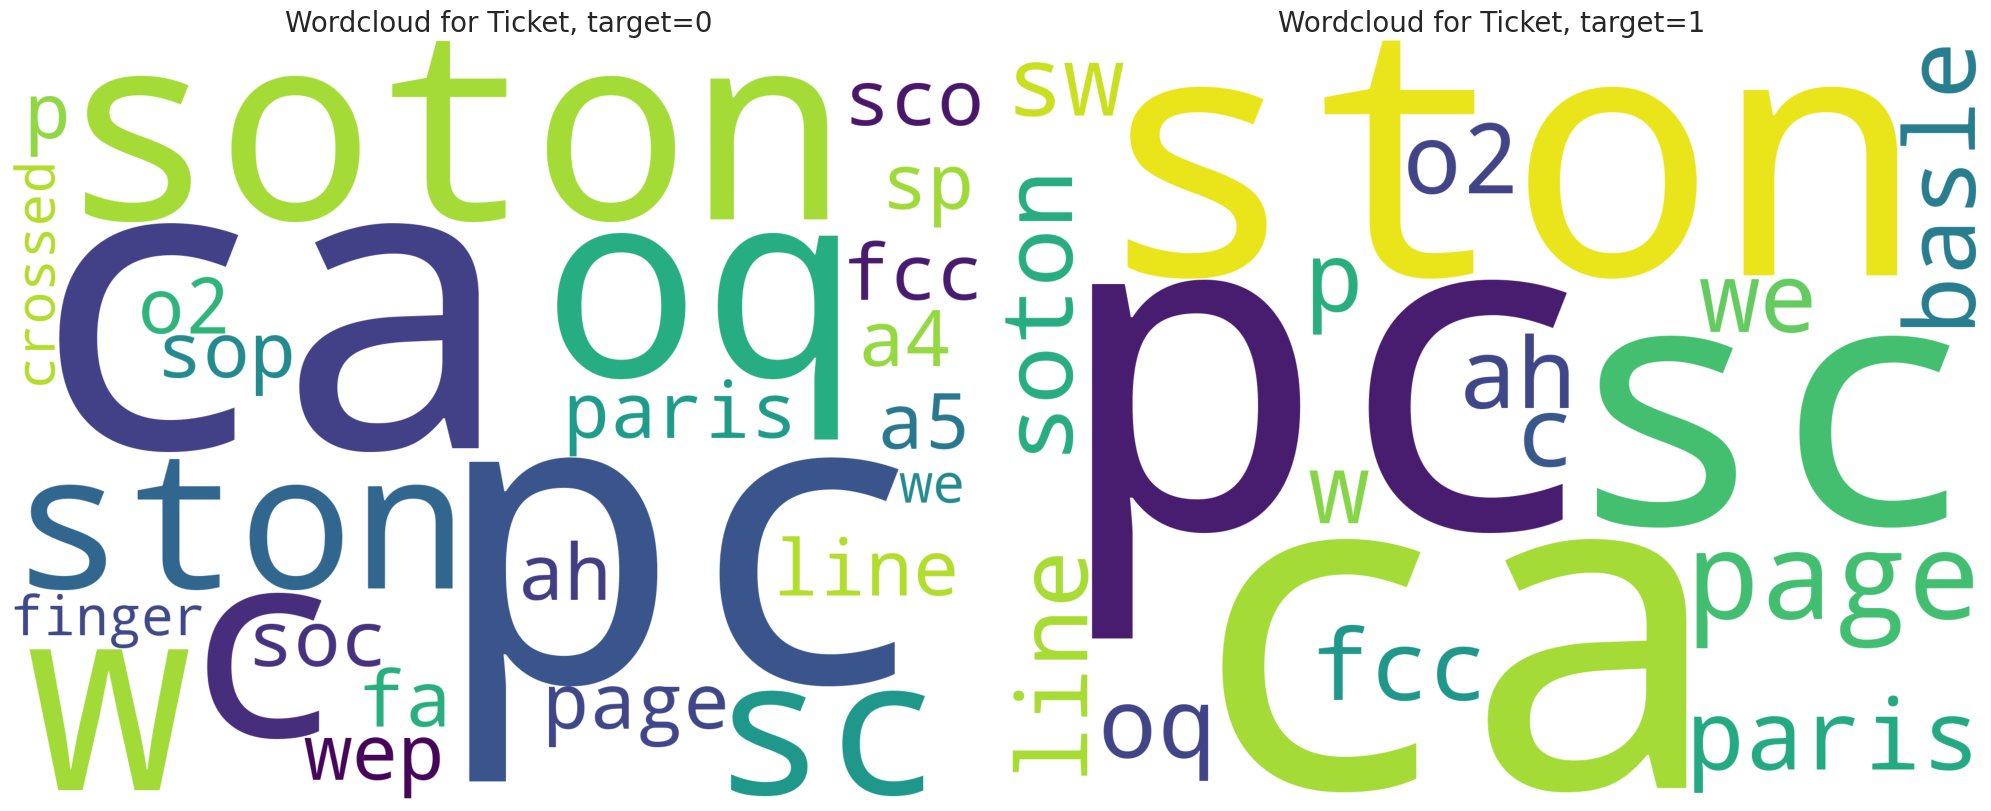

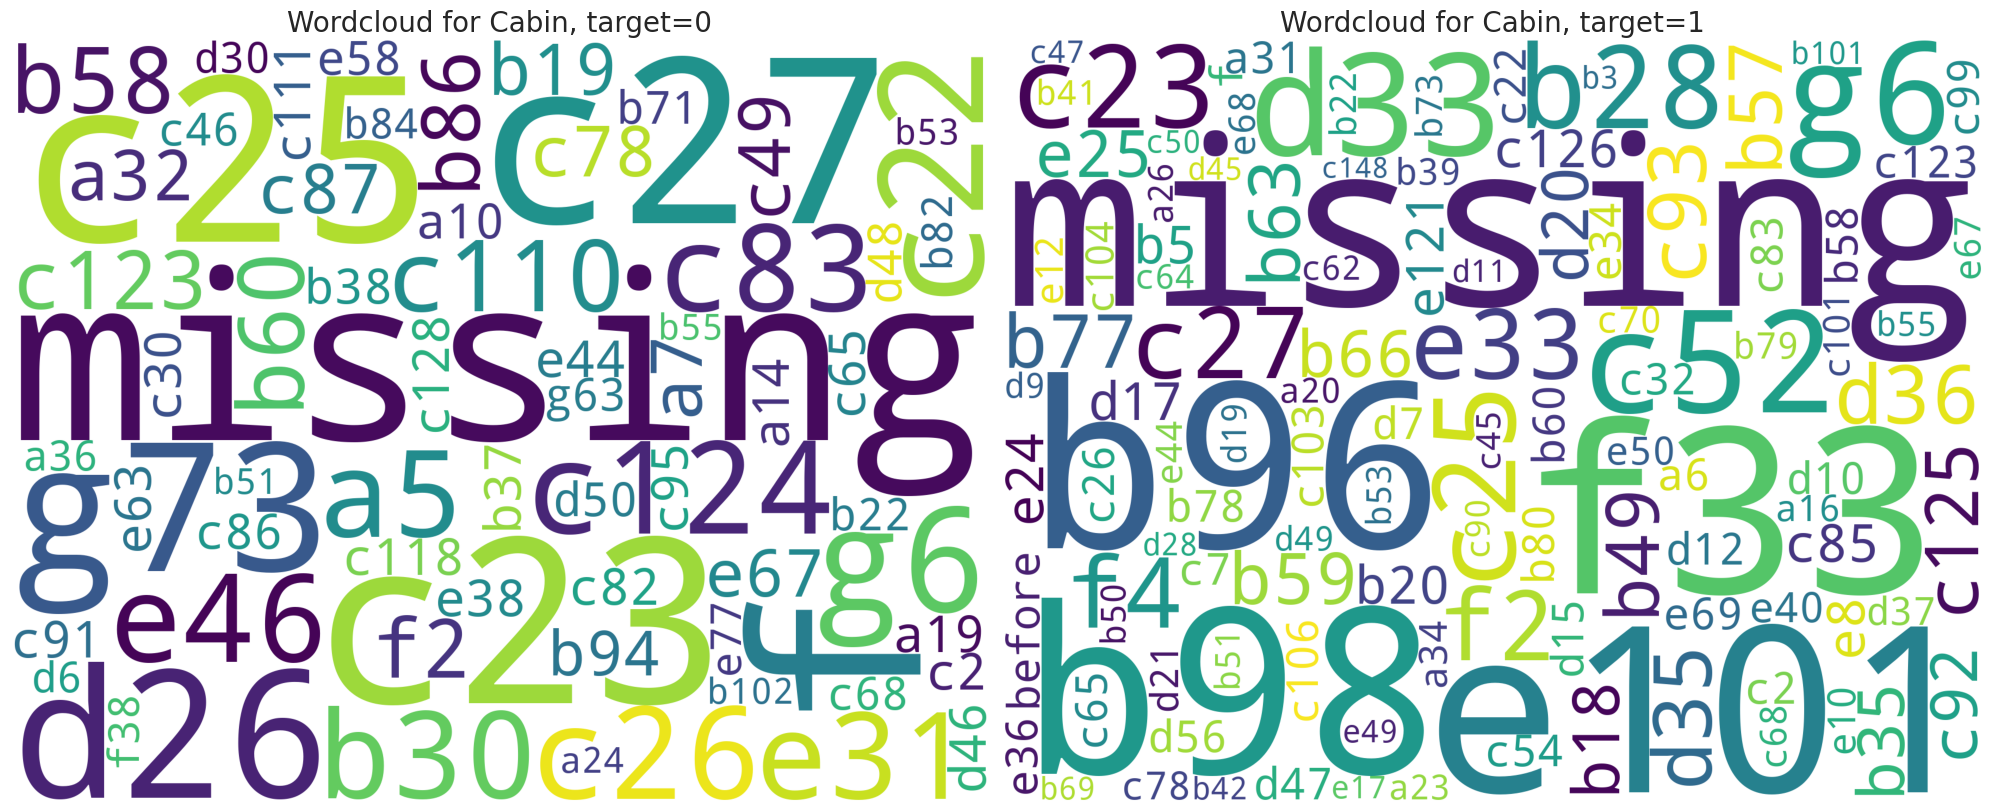

All Plots done
Time to run AutoViz = 27 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [22]:
eda_utils.autovisualize(df_trn, target="Survived")

## 2. Feature Engineering

#### Data type conversion.
Replace string feature values with numeric values.

In [23]:
df_trn = engineer_feats.str_to_numeric(df_trn)
df_tst = engineer_feats.str_to_numeric(df_tst)

#### Data Imputation: Age (both trn and tst)

In [24]:
df_trn, df_tst = engineer_feats.impute_age(df_trn, df_tst)

Pclass        0.37
SibSp         0.31
Parch         0.19
Fare          0.10
Sex           0.09
Survived      0.08
Embarked      0.06
PassengerId   0.04
Name: Age, dtype: float64
=> Age is significantly correlated with Pclass and SibSp.


#### Data Imputation: Cabin (both trn and tst)

Cabin is quite highly correlated with `Survived`, so we cannot drop it despite the high frequency of missing values. We will impute the missing values after finding the most significantly correlated feature(s).

In [25]:
df_trn, df_tst = engineer_feats.impute_cabin(df_trn, df_tst)

Pclass        0.60
Fare          0.30
Embarked      0.29
Age           0.19
PassengerId   0.09
Sex           0.08
SibSp         0.04
Parch         0.02
Survived      0.02
Name: Cabin, dtype: float64
=> discretized Cabin feature is highly correlated with Pclass. 
So, can use Pclass to impute Cabin.


#### Data Imputation: Embarked (trn)

Only 2 missing in `df_trn`. None missing in `df_tst`.

In [26]:
df_trn = engineer_feats.impute_embarked(df_trn)

Cabin         0.33
Pclass        0.31
Fare          0.27
Survived      0.13
Age           0.08
SibSp         0.03
Sex           0.03
Parch         0.03
PassengerId   0.02
Name: Embarked, dtype: float64
=> Cabin and Pclass are significantly correlated.


#### Data Imputation: Fare (tst)
Only df_tst has missing value(s).    
df_trn has been passed in because all statistics must be computed on (only) the training distribution.

In [27]:
df_tst = engineer_feats.impute_fare(df_trn, df_tst)

Cabin         0.56
Pclass        0.55
Embarked      0.27
Survived      0.26
Parch         0.22
Sex           0.18
SibSp         0.16
Age           0.11
PassengerId   0.01
Name: Fare, dtype: float64
=> Cabin and Pclass are highly correlated with Fare.


## 3. Manifold Visualization

### 3.1 PCA

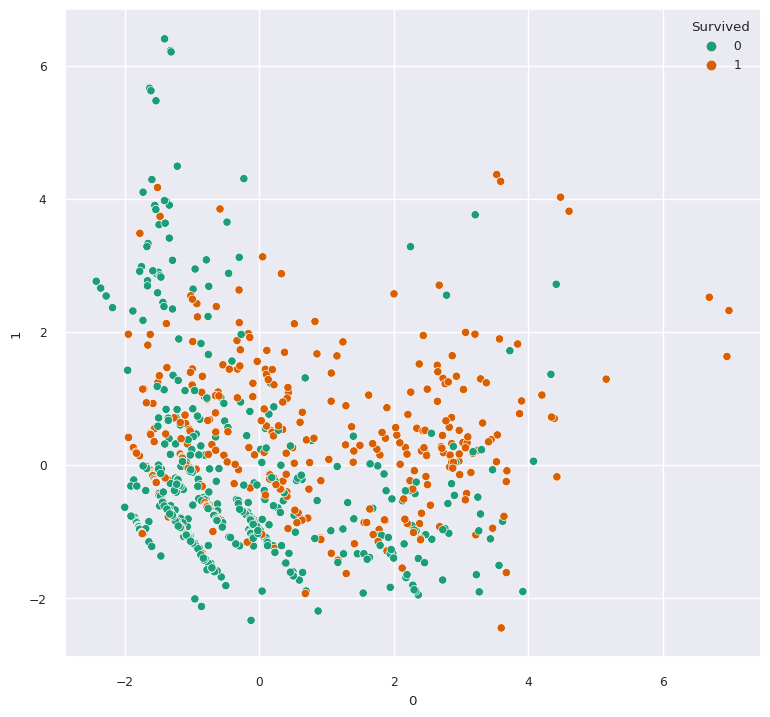

In [28]:
eda_utils.pca(df_trn)

### 3.2 t-SNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 891 samples in 0.003s...
[t-SNE] Computed neighbors for 891 samples in 0.065s...
[t-SNE] Computed conditional probabilities for sample 891 / 891
[t-SNE] Mean sigma: 0.751927


[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.637417
[t-SNE] KL divergence after 300 iterations: 0.684447


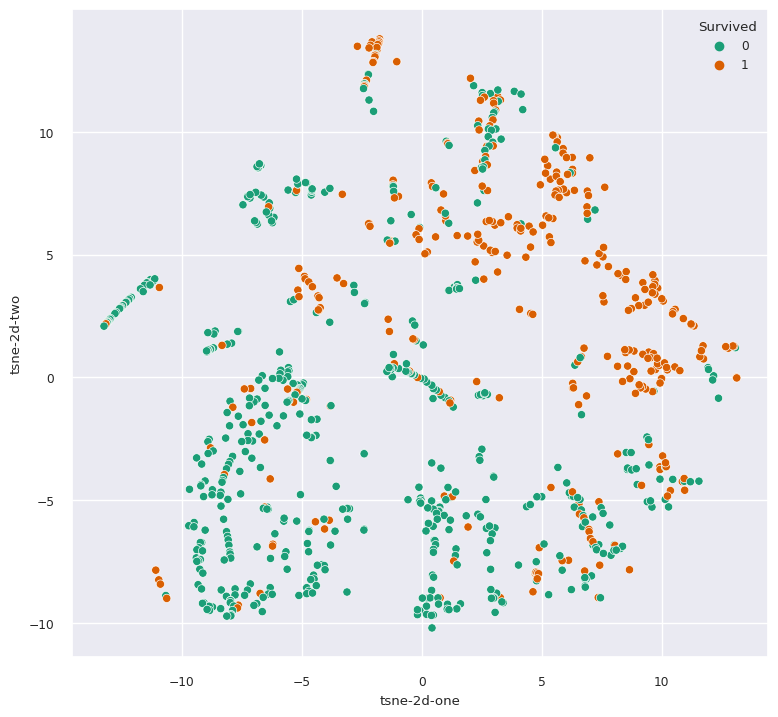

In [29]:
eda_utils.tsne(df_trn)

## 4. Learning Baselines 

In [30]:
trn_X, trn_Y, val_X, val_Y, df_tst = preprocess.prep_feats_for_modeling(df_trn, df_tst)

In [31]:
models = train_model.baseline(trn_X, val_X,
                              trn_Y, val_Y)

 90%|████████▉ | 26/29 [00:01<00:00, 24.92it/s]

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 29/29 [00:01<00:00, 17.15it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDisc